# Worldwide soybean production

Our objective is to understand what countries are the main producers of soybeans.
Our aim is to select the top main producers to provide a statistical analysis of its production of soybeans on the futures prices

### Dataset source:

[Foreign Agricultural Service (FAS)](https://apps.fas.usda.gov/psdonline/app/index.html#/app/advQuery)


[Statista Data for the US Production](https://www.statista.com/statistics/192058/production-of-soybeans-for-beans-in-the-us-since-2000/)

## imports utilizados no projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Production Data Overview

In [2]:
# Download the dataset
# Production = 1000MT

data = pd.read_csv('../raw_data/FAS_Oilseed_soybean_production_world.csv', thousands = ",")

In [3]:
data["Crop_year"] = data['Year'].apply(lambda year: int(year.split("/")[0]))

In [4]:
data.shape

(58, 101)

In [5]:
data.head()

,Year,Attribute,Commodity,Algeria,Argentina,Australia,Austria,Bangladesh,Barbados,Belarus,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Unit Description,Total_Production,Crop_year
0,1964/1965,Production,"Oilseed, Soybean",0,0,1,0,0,0,0,...,19076,0,0,0,0,0,0,(1000 MT),28699,1964
1,1965/1966,Production,"Oilseed, Soybean",0,0,1,0,0,0,0,...,23014,0,0,0,0,0,0,(1000 MT),31080,1965
2,1966/1967,Production,"Oilseed, Soybean",0,0,1,0,0,0,0,...,25269,0,0,0,0,0,0,(1000 MT),35732,1966
3,1967/1968,Production,"Oilseed, Soybean",0,0,2,0,0,0,0,...,26575,0,0,0,0,0,2,(1000 MT),37098,1967
4,1968/1969,Production,"Oilseed, Soybean",0,0,2,0,0,0,0,...,30127,0,0,0,0,0,8,(1000 MT),40611,1968


## Historical Data of Total Production Worldwide

### Selecting top5 Producers countries

In [6]:
year = "2020/2021"
last_year = data[data["Year"] == year]
last_year = last_year.drop(columns = ['Attribute', 'Commodity','Unit Description', 'Total_Production'] )
last_year = last_year.set_index('Year')
last_year = (last_year.T)
last_year = last_year.reset_index()
last_year.columns = ["Country", "Production"]
top5 = last_year.sort_values(by = "Production", ascending = False).head(5)

In [7]:
top5

,Country,Production
10,Brazil,138000
88,United States,114749
1,Argentina,46200
14,China,19602
40,India,10450


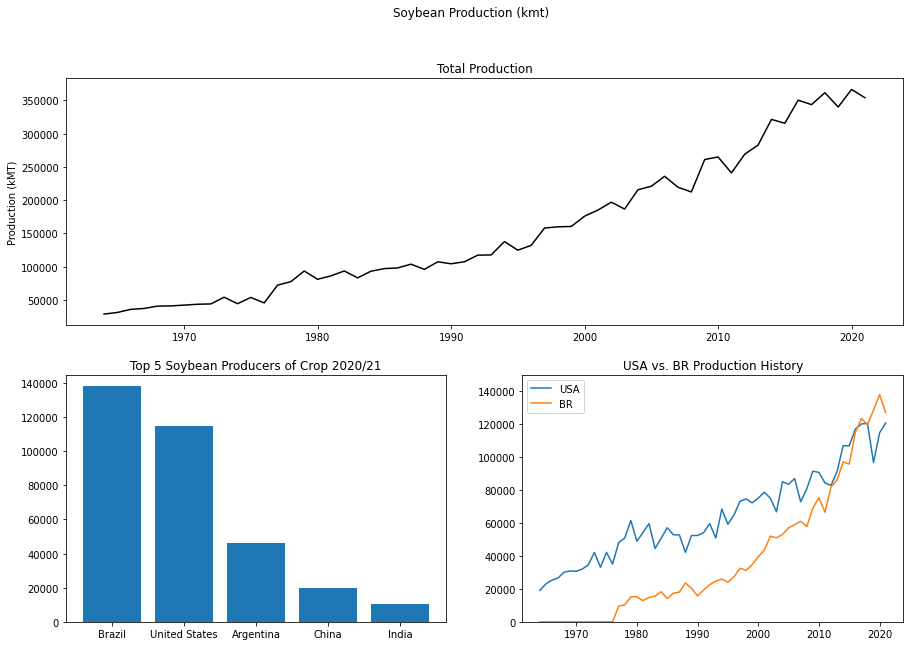

In [8]:
usa_prod = data['United States']
br_prod = data['Brazil']
total_prod = data['Total_Production']
years_x = data["Crop_year"]

# Start a figure
fig = plt.figure(figsize=(15,10))

# Create subplots (subplot( linhas, colunas, figura a ser plotada))
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,2,3)
# ax3 = fig.add_subplot(2,2,4) 

# First subplot
plt.subplot(2,1,1) 
plt.plot(years_x, total_prod, label="total", c='black')
plt.title("Total Production")
plt.ylabel('Production (kMT)')

# Second subplot
plt.subplot(2,2,3)
plt.bar("Country", "Production", data = top5)
plt.title('Top 5 Soybean Producers of Crop 2020/21')

# Third subplot
plt.subplot(2,2,4)
plt.plot(years_x, usa_prod, label="USA")
plt.plot(years_x, br_prod, label = "BR")
plt.title('USA vs. BR Production History')
plt.ylim(0,150000)
plt.legend()

# Global figure methods
plt.suptitle('Soybean Production (kmt)')
plt.show()


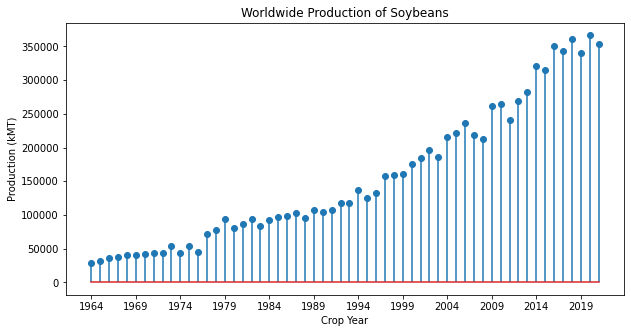

In [9]:
x = data['Crop_year']
y = data['Total_Production']

plt.figure(figsize=(10,5))
plt.stem(x, y)
plt.xlabel("Crop Year")
plt.ylabel('Production (kMT)')
plt.xticks(range(1964,2022,5))
plt.title("Worldwide Production of Soybeans")
plt.show()

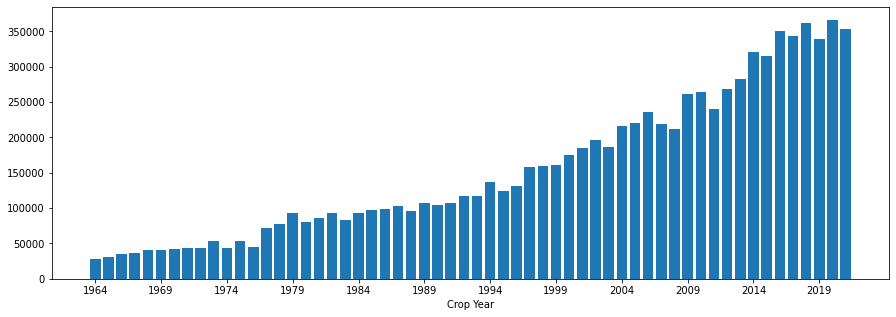

In [10]:
# Grafico da producao mundial total
plt.figure(figsize=(15,5))
plt.bar("Crop_year", "Total_Production", data = data)
plt.xticks(range(1964,2022,5))
plt.xlabel("Crop Year")
plt.show()

### Como posso fazer alguns stats aqui?
Adicionar grafico iterativo para saber o volume quando passar o mouse no grafico


Taxa de crescimento da producao?

In [11]:
# Tentando fazer um grafico iterativo com o historico da Producao

In [12]:
# import plotly.express as px
# data_prod = px.data()
# fig = px.bar(data_prod, x='Crop_year', y='Total_Production')
# fig.show()

In [13]:
## Last Crop Available

In [14]:
# Tentando fazer um grafico de PIE com o top 5 producers

In [15]:
# import plotly.express as px
# df = px.data.gapminder().query("Country").query("Production")
# df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
# fig = px.pie(df, values='pop', names='country', title='Population of European continent')
# fig.show()

## Prices for Soybeans

In [16]:
# Variables of soybeans and soy sub-products
soyMeal = yf.Ticker('ZM=F')
soyOil = yf.Ticker('ZL=F')
soybean = yf.Ticker('ZS=F')

soyMeal = soyMeal.history(period="max")
soyOil = soyOil.history(period="max")
soybean = soybean.history(period="max")

# Lists I use for manipulating the dataframe for each commodity
commodities = [soyMeal, soyOil, soybean]
commodityName = ['soyMeal', 'soyOil', 'soybean']



In [17]:
# Drop all columns except date and close price, rename close price to name of the commodity
col2drop = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
count = 0

for i in commodities:
    i.drop(columns = col2drop, axis = 0, inplace = True)
    i.columns = [commodityName[count]]
    count += 1

In [18]:
# Join all data frames into one
df = pd.concat(commodities, join='outer', axis=1)

# Some prices are missing for things like holidays, use forward fill to make the missing values the same as the previous
df.ffill()
df.dropna()

,soyMeal,soyOil,soybean
Date,,,
2000-09-20,167.800003,15.270000,483.25
2000-09-21,170.800003,15.360000,486.50
2000-10-03,172.699997,15.300000,488.50
2000-10-09,167.399994,15.120000,484.50
2000-10-10,168.800003,15.180000,483.00
...,...,...,...
2022-03-14,521.900024,78.730003,1687.25
2022-03-15,484.000000,73.680000,1658.75
2022-03-16,478.000000,73.550003,1649.25


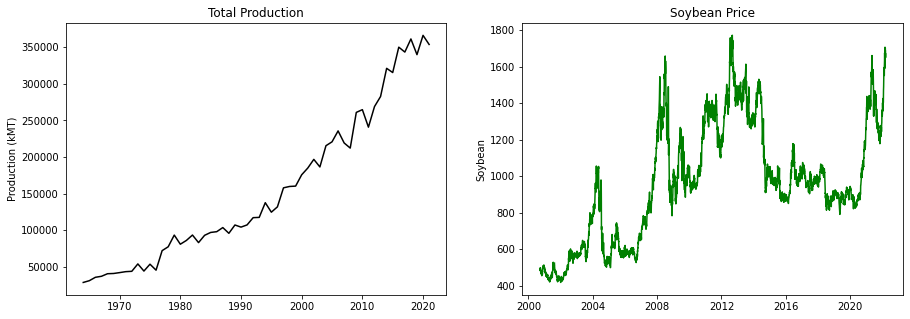

In [19]:
fig = plt.figure(figsize=(15,5))
# First subplot
plt.subplot(1,2,1) 
plt.plot(years_x, total_prod, label="total", c='black')
plt.title("Total Production")
plt.ylabel('Production (kMT)')

# Second subplot
plt.subplot(1,2,2)
plt.plot(df.reset_index()["Date"], df['soybean'], label="soybean", c='green')
plt.title("Soybean Price")
plt.ylabel('Soybean')
plt.show()

# Market overview

## Market Overview USA

U.S. Soy Production
The major U.S. oilseed crops are soybeans, cottonseed, sunflower seed, canola, rapeseed, and peanuts. Soybeans are the dominant oilseed in the United States, accounting for about 90 percent of U.S. oilseed production. Most U.S. soybeans are planted in May and early June and harvested in late September and October (see Usual Planting and Harvesting Dates for U.S. Field Crops for soybean dates by region).


Large-scale production of soybeans did not begin until the 20th century in the United States, but since then area planted to soybeans has expanded rapidly. Increased planting flexibility, yield improvements from narrow-rowed seeding practices, a greater number of 50-50 corn-soybean rotations, and low production costs (partly due to widespread adoption of herbicide-tolerant varieties) favored expansion of soybean acreage. More than 90 million acres of soybeans were planted in 2017, and in 2018 acres planted to soybeans in the United States exceeded corn acres for the first time since 1983. Soybean acres have decreased recently to 76.1 million in 2019.

Source:

https://www.ers.usda.gov/topics/crops/soybeans-oil-crops/oil-crops-sector-at-a-glance/



US soybeans
For the US soybeans, 2021-22 productions are held steady at 4.435 billion bushels (120.8 million mt), steady on February estimates and 219 million bushels lower year on year.

Soybean harvested area for the US is estimated at 86.3 million acres, steady on the previous report.

The US soybean yield forecast for the 2021-22 marketing year (September-August) has been estimated at 51.4 bu/acre, unchanged on previous estimate in January.

The USDA sees the US soybean crush for the 2021-22 marketing year at 2.215 billion bushels (60.3 million mt), up 25 million bushels on previous estimates.

Soybean crush is forecast higher from last month on favorable crush margins and improving prospects for soybean meal exports, the USDA said.

Soybean exports estimates have been raised to 2.090 billion bushels (56.88 million mt) from the previous estimate of 2.050 billion bushels (55.8 million mt), the report said. However, 2021-22 ending stocks are projected at 285 million bushels (7.75 million mt), down 40 million bushels on previous estimate, the USDA said.

Soybean exports are raised on lower production and reduced exports for South America, the report said.


https://www.spglobal.com/commodity-insights/en/market-insights/latest-news/agriculture/030922-south-american-soybean-supply-projections-for-2021-22-cut-yet-again-by-usda

Dataset US Porduction:

https://www.statista.com/statistics/192058/production-of-soybeans-for-beans-in-the-us-since-2000/



US Crop seasonality:

planting period: May and early June

harvest period: late September and October


## Market overview Brazil

Safra Velha x Safra Nova
Os meses de negociação padronizados para os futuros de Milho, Soja e Trigo refletem os padrões sazonais para o plantio,
colheita e comercialização da safra correspondente. Estes meses de negociação também são indicativos da fonte de 
oferta em qualquer momento em particular.

Durante os meses de plantio, primavera para o milho e a soja e o outono para o trigo de inverno, 
a fonte de grãos que está disponível para venda ou compra pelos usuários finais é das safras que foram colhidas 
durante a temporada de colheita anterior - a safra velha. 

Por outro lado, durante os meses de colheita, tipicamente julho para o trigo de inverno e novembro e dezembro
para o milho e a soja, a safra recém-colhida chega ao mercado e a oferta é maior, daí, a safra nova.

Cada commodity grão tem um mês de vencimento de futuros de safra nova e todos os outros são meses da safra velha.

Agora, você pode pensar intuitivamente que a negociação de futuros de Grãos mais distante no tempo,
provavelmente, tenha preço mais elevado que na negociação de Grãos do momento, ou em relação aos meses de vencimento
de futuros mais próximos por causa de fatores como custos de transporte, armazenamento etc., que poderiam elevar
os preços naqueles meses diferidos. No entanto, quando você observar mais de perto os mercados de grãos durante 
os meses de safra velha e de safra nova, você entenderá por que isso não ocorre necessariamente sempre.

Durante os meses de safra velha, quando a oferta é geralmente inferior, os grãos tendem a ser mais caros do que
nos meses mais distantes de negociação da safra nova.

Quando uma safra nova é colhida, novamente há maior nível de oferta. É por isso que muitos dos mercados de grãos 
tendem a refletir os seus preços sazonais mais baixos durante o mês de negociação de safra nova.

Os mercados de trigo têm uma tendência a queda entre a primavera e a colheita de julho, depois começam a ter 
alta a partir das reduções de colheita no outono e inverno.  

Com a soja, a colheita começa em setembro e continua de outubro a meados de novembro. A soja tende a seguir 
um padrão onde os preços começam a cair no período de julho a agosto, seguindo com o "intervalo de fevereiro”, 
antes de atingir suas altas sazonais no verão. O farelo e o óleo de soja têm as mesmas tendências sazonais que a soja.

Com o milho, a tendência sazonal mais pronunciada é a dos preços perto de seu nível mais elevado em torno de
julho por causa da incerteza com a produção da safra nova, depois tendem a cair a partir da metade do verão até 
a época de colheita.  

Fonte:
    
https://www.cmegroup.com/pt/education/learn-about-trading/introduction-to-grains-and-oilseeds/understanding-seasonality-in-grains.html


BR Crop seasonality

Norte >
    planting period : October to June
    harvest period: January to October

Nordeste >
    planting period : October to January
    harvest period: February to July
        
Centro-oeste >
    planting period : September to December
    harvest period: January to April
        
Sudeste >
    planting period : September to December
    harvest period: January to May
        
Sul >
    planting period : September to December
    harvest period: January to May
    

Anotacoes do prof

1. Stats model para tendencia e sazonalidade: preco e producao
Facebook profet > vamos analisar as tendencias e sazonalidades

> Scaling da producao e do preco e o plot linear dos 2

2. RNN : para cotacao de precos diarios
        para cotacoes mensais

3. Producao: fatores que afetam a producao, precisamos de um dataset para fazer a estimativa dele (falta variaveis exogenas)

4. Colocar a cotacao do dolar para os produtores brasileiros?

Grafico de barras ou box plot no valor do tempo, 

Tarefas:

5 dia temos que ter o MVP (Minimum Value Product) -- Prox quarta
- Vamos ter a API que depende de um modelo
- Frontend: fazer um desenho de como vai ficar a cara do ambiente
- input do usuario:
    entrar com o dia para saber o preco
    contrato de futuros
    Paises produtores de soja
    Produtor entra com o volume de soja deles e verificar o Lucro no futuro?
    
- Inputs para o produtor:
    a. Comportamento sazonal padrao do Brasil > qual o nivel de concorrencia no mercado
    b. Dataset dos contratos de futuros????

- Visao de negocio:
    a. Como cobramos o uso das info que estamos disponibilizando
    



In [20]:
# Stats Model

In [21]:
data_prod2001 = data[data["Crop_year"]>=2001]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
soy_price = scaler.fit_transform(df[['soybean']])

scaler = MinMaxScaler()
soy_prod = scaler.fit_transform(data_prod2001[['Total_Production']])



In [24]:
soy_price

(5542, 1)

In [25]:
soy_prod.shape

(21, 1)

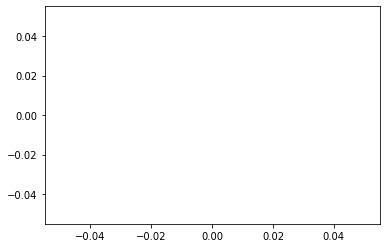

In [27]:
plt.scatter(x= soy_price[0], y = soy_prod[0])